### Target:
- To achive the better results with data augmentation techniques and filling up the training gap

### Results:

- Model Parameters : 7,496
- Best Training accuracy : 99.01
- Best Training loss : 0.0040
- Best Testing accuracy : 99.43
- Best Testing loss : 0.0191

### Analysis:

- The model is underfitted
- There were some examples in testing data on which model was not able to give correct prediction, adding data augmentation helps to modifies the training samples, which increse the performance of model while training, we can see it as the jump in training accuracy and also the model is able to predict the testing data better compare with last model.
- The best training accuracy shows the gap for future training.


### Improvments:
-  Adding learning rate schedulers can help to improve the training, as model update weights with step of a particular learning rate so there is a chance that model may be stuck at the local minima which can be solved by incrersing or decresing the learning rate.

<div class="row">
  <div class="column">
    <img src="./images/Augmentation.jpg" width="550" class="center">
    <img src="./images/CAPACITY.jpg" width="550" class="center">
  </div>
</div>

In [27]:
import torch
from torchvision import transforms

import torch.optim as optim

from model import Net2, modelsummary
from utils import build_mnist, Trainer, plot_sampledata, evaluate_model

In [28]:
# CUDA?
torch.manual_seed(1)
cuda = torch.cuda.is_available()
print("CUDA Available?", cuda)

CUDA Available? True


In [29]:
# Train data transformations
train_transforms = transforms.Compose(
    [
        # transforms.RandomApply(
        #     [
        #         transforms.CenterCrop(22),
        #     ],
        #     p=0.1,
        # ),
        transforms.ColorJitter(brightness=0.4, contrast=0.4, saturation=0.40, hue=0.1),
        transforms.RandomRotation((-5.0, 5.0), fill=(0.1307,)),
        transforms.Resize((28, 28)),
        transforms.ToTensor(),
        transforms.Normalize((0.1307,), (0.3081,)),
    ]
)

# Test data transformations
test_transforms = transforms.Compose(
    [transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))]
)

In [30]:
batch_size = 128

kwargs = {
    "batch_size": batch_size,
    "shuffle": True,
    "num_workers": 2,
    "pin_memory": True,
}

train_data, train_loader = build_mnist(
    set="train", transforms=train_transforms, **kwargs
)
test_data, test_loader = build_mnist(set="test", transforms=test_transforms, **kwargs)

100%|██████████| 9912422/9912422 [00:00<00:00, 143854619.34it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 117379548.28it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 33557138.75it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 13715283.49it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



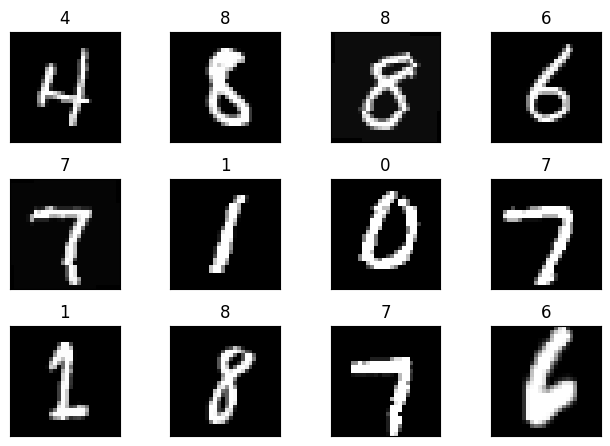

In [31]:
plot_sampledata(train_loader)

In [38]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
model = Net2().to(device)
modelsummary(model, device)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 8, 26, 26]              72
              ReLU-2            [-1, 8, 26, 26]               0
       BatchNorm2d-3            [-1, 8, 26, 26]              16
           Dropout-4            [-1, 8, 26, 26]               0
            Conv2d-5           [-1, 16, 24, 24]           1,152
              ReLU-6           [-1, 16, 24, 24]               0
       BatchNorm2d-7           [-1, 16, 24, 24]              32
           Dropout-8           [-1, 16, 24, 24]               0
         MaxPool2d-9           [-1, 16, 12, 12]               0
           Conv2d-10            [-1, 8, 12, 12]             128
             ReLU-11            [-1, 8, 12, 12]               0
      BatchNorm2d-12            [-1, 8, 12, 12]              16
           Conv2d-13           [-1, 12, 10, 10]             864
             ReLU-14           [-1, 12,

In [39]:
num_epochs = 15
model = Net2().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.015, momentum=0.9)  # large learning rate

trainer = Trainer(model, device, optimizer)
for epoch in range(1, num_epochs + 1):
    print(f"Epoch {epoch}")
    trainer.train(train_loader)
    trainer.test(test_loader)

Epoch 1


Train: Loss=0.0630 Batch_id=468 Accuracy=91.78: 100%|██████████| 469/469 [00:40<00:00, 11.47it/s]


Test set: Average loss: 0.0757, Accuracy: 9761/10000 (97.61%)

Epoch 2


Train: Loss=0.1186 Batch_id=468 Accuracy=97.50: 100%|██████████| 469/469 [00:40<00:00, 11.64it/s]


Test set: Average loss: 0.0418, Accuracy: 9863/10000 (98.63%)

Epoch 3


Train: Loss=0.0895 Batch_id=468 Accuracy=98.01: 100%|██████████| 469/469 [00:41<00:00, 11.32it/s]


Test set: Average loss: 0.0341, Accuracy: 9889/10000 (98.89%)

Epoch 4


Train: Loss=0.0348 Batch_id=468 Accuracy=98.21: 100%|██████████| 469/469 [00:40<00:00, 11.54it/s]


Test set: Average loss: 0.0314, Accuracy: 9905/10000 (99.05%)

Epoch 5


Train: Loss=0.0172 Batch_id=468 Accuracy=98.49: 100%|██████████| 469/469 [00:40<00:00, 11.68it/s]


Test set: Average loss: 0.0274, Accuracy: 9918/10000 (99.18%)

Epoch 6


Train: Loss=0.0330 Batch_id=468 Accuracy=98.50: 100%|██████████| 469/469 [00:40<00:00, 11.67it/s]


Test set: Average loss: 0.0260, Accuracy: 9922/10000 (99.22%)

Epoch 7


Train: Loss=0.1071 Batch_id=468 Accuracy=98.68: 100%|██████████| 469/469 [00:40<00:00, 11.55it/s]


Test set: Average loss: 0.0238, Accuracy: 9923/10000 (99.23%)

Epoch 8


Train: Loss=0.0451 Batch_id=468 Accuracy=98.75: 100%|██████████| 469/469 [00:40<00:00, 11.66it/s]


Test set: Average loss: 0.0264, Accuracy: 9915/10000 (99.15%)

Epoch 9


Train: Loss=0.0416 Batch_id=468 Accuracy=98.82: 100%|██████████| 469/469 [00:39<00:00, 11.78it/s]


Test set: Average loss: 0.0212, Accuracy: 9935/10000 (99.35%)

Epoch 10


Train: Loss=0.0464 Batch_id=468 Accuracy=98.85: 100%|██████████| 469/469 [00:41<00:00, 11.18it/s]


Test set: Average loss: 0.0251, Accuracy: 9927/10000 (99.27%)

Epoch 11


Train: Loss=0.0134 Batch_id=468 Accuracy=98.92: 100%|██████████| 469/469 [00:40<00:00, 11.72it/s]


Test set: Average loss: 0.0233, Accuracy: 9925/10000 (99.25%)

Epoch 12


Train: Loss=0.0624 Batch_id=468 Accuracy=98.98: 100%|██████████| 469/469 [00:40<00:00, 11.68it/s]


Test set: Average loss: 0.0216, Accuracy: 9924/10000 (99.24%)

Epoch 13


Train: Loss=0.0159 Batch_id=468 Accuracy=98.98: 100%|██████████| 469/469 [00:40<00:00, 11.68it/s]


Test set: Average loss: 0.0214, Accuracy: 9935/10000 (99.35%)

Epoch 14


Train: Loss=0.0278 Batch_id=468 Accuracy=99.00: 100%|██████████| 469/469 [00:40<00:00, 11.58it/s]


Test set: Average loss: 0.0222, Accuracy: 9933/10000 (99.33%)

Epoch 15


Train: Loss=0.0040 Batch_id=468 Accuracy=99.01: 100%|██████████| 469/469 [00:40<00:00, 11.65it/s]


Test set: Average loss: 0.0191, Accuracy: 9943/10000 (99.43%)



Set	 Max Acc@Epoch	 Last Epoch Acc
train	 99.01@15		99.01
test	 99.43@15		99.43


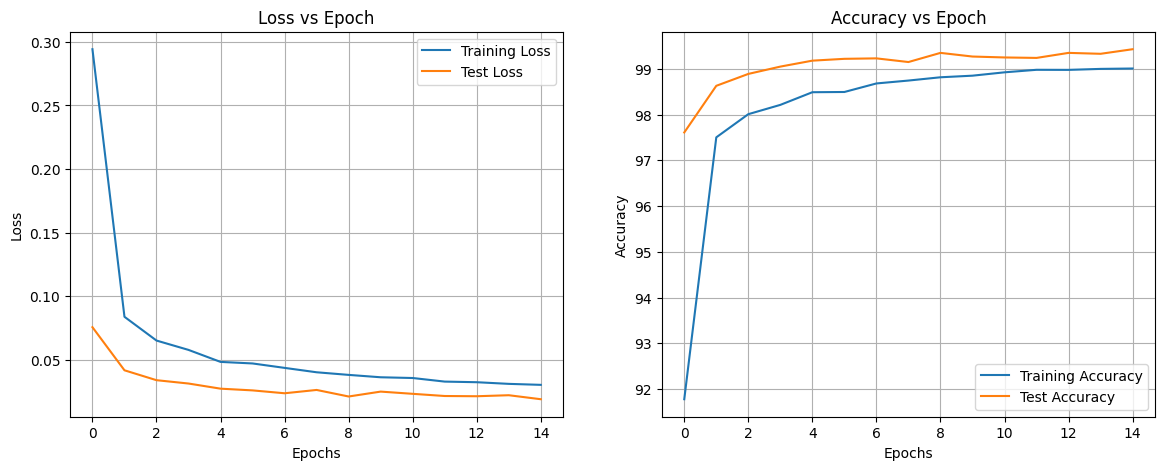

In [40]:
trainer.plot_history()

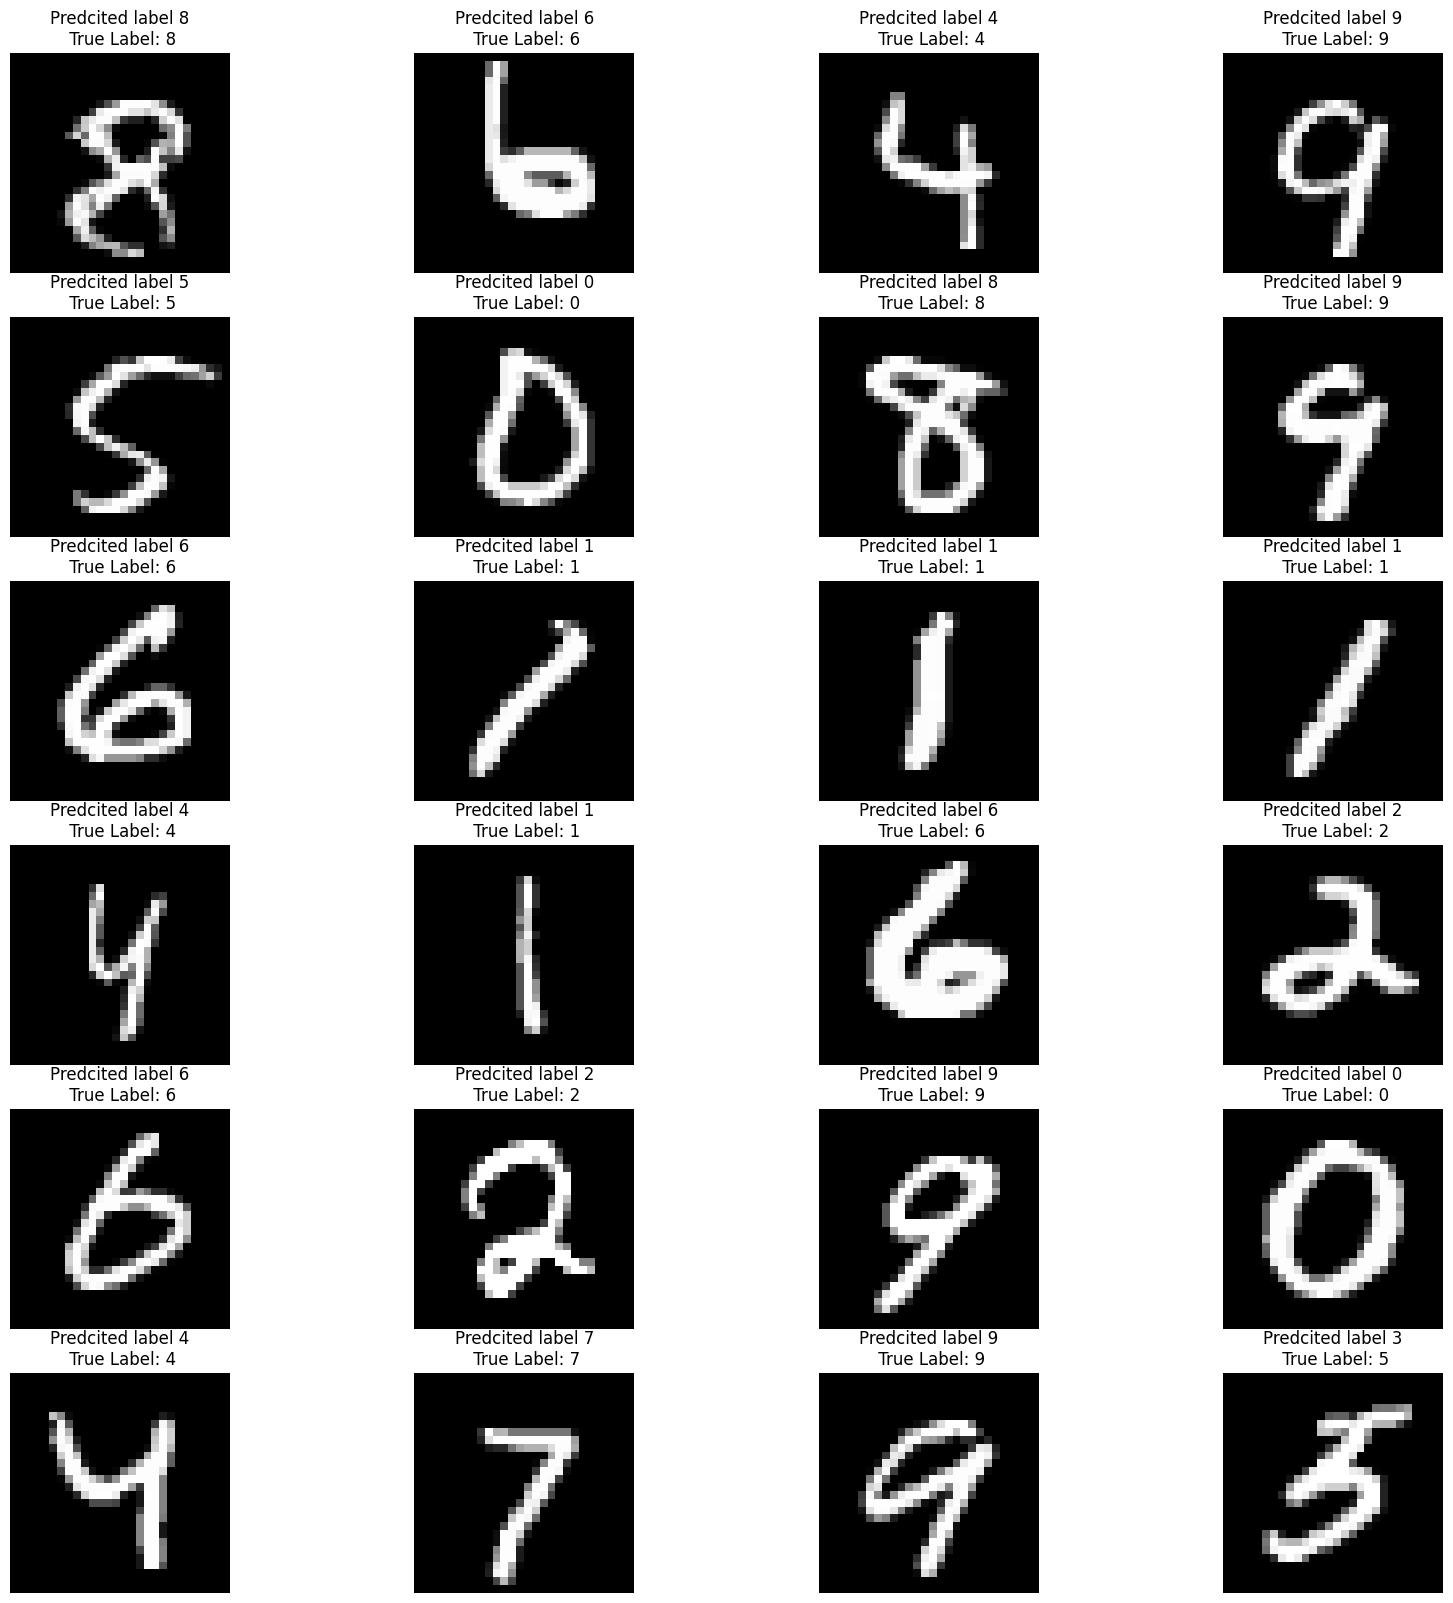

In [41]:
evaluate_model(trainer.model, test_loader, device)